Import Libraries

In [13]:
import numpy as np
import random
import sys
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

np.set_printoptions(threshold=sys.maxsize)
np.random.seed(0)

df = pd.read_csv("titanic_dataset.csv", header=None)
  

# Normalize columns
#df[1] = df[1] /df[1].abs().max()
df[2] = df[2] /df[2].abs().max()
#df[3] = df[3] /df[3].abs().max()
#df[4] = df[4] /df[4].abs().max()
df[5] = df[5] /df[5].abs().max()
  
# Map data to array
dataSet = df.to_numpy()
#Shuffle
np.random.shuffle(dataSet)

# Set training and testing sets    
trainingSet = dataSet[:571]
testSet = dataSet[571:]



Initialize Weights

In [14]:
errorThreshold = 0.2

# Generate random weights
wH = np.random.normal(-0.1, 0.1, (5, 4))
wO = np.random.normal(-0.1, 0.1, (4, 1))
print("Original hidden layer weights: ", wH)
print("Original output layer weights: ",wO)

Original hidden layer weights:  [[ 0.07640523 -0.05998428 -0.0021262   0.12408932]
 [ 0.0867558  -0.19772779 -0.00499116 -0.11513572]
 [-0.11032189 -0.05894015 -0.08559564  0.04542735]
 [-0.02389623 -0.0878325  -0.05561368 -0.06663257]
 [ 0.04940791 -0.12051583 -0.06869323 -0.18540957]]
Original output layer weights:  [[-0.35529898]
 [-0.03463814]
 [-0.01355638]
 [-0.1742165 ]]


Sigmoid

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


Training

In [16]:
badFactsPerEpoch: List[float] = list()
percentage = 0
epochs = 0
    
while True:
    badFacts: int = 0

        
    for fact in trainingSet:
        
        # Set Input and Target
        targetString = fact[5]
        input = np.array([0, 0, 0, 0, 0], dtype=np.float64)
        

        input[0] = fact[1]
        input[1] = fact[2]
        input[2] = fact[3]
        input[3] = fact[4]
        input[4] = fact[5]
        target = fact[0]


            
        # Feedforward
        netH = np.dot(input, wH).astype(np.float64)
        outH = sigmoid(netH)
        netO = np.dot(outH, wO).astype(np.float64)
        outO = sigmoid(netO)
        error = target - outO

        # Check error threshold
        if abs(error) > errorThreshold:
                
            badFacts +=1
        # Error Back Propagation
            #backPropogation(outO, outH, target, input, wH, wO)
             # deltaO
            deltaO = outO * (1 - outO) * (target - outO)
    # change in wO
            eta = 0.2
            i = 0
            for output in outH:
        
                wO[i][0] += eta * deltaO * output
                i = i + 1
    #sigmaDelta
            sum = 0  
    #deltaH
            j = 0
            deltaH = np.array([0, 0, 0, 0], dtype=np.float64)
            for entry in outH:
                sum += (deltaO * wO[j, 0])
                deltaH[j] = (entry * (1 - entry) * (sum))
                j = j + 1
    # change in wH
            eta = 0.2
            k = 0
            for inputs in input:
                x = 0
                for delta in deltaH:
                    wH[k][x] += eta * delta * inputs
                    x = x + 1
                k = k + 1


        
    badFactsPerEpoch.append((badFacts / len(trainingSet)) * 100)
    percentage = (badFacts / len(trainingSet))*100   
    if epochs == 999 or badFactsPerEpoch[-1] == 0:
        print("End of training - Model did not converge")
        break
    epochs = epochs + 1

print("Percentage: ", percentage)
print("New wH: ", wH)


End of training - Model did not converge
Percentage:  79.6847635726795
New wH:  [[ 1.05683928e+00 -2.23822310e+00  4.16028124e+00  1.30388581e+00]
 [ 1.39805352e+00  3.87573941e+01  1.50852971e+00  5.43141594e+00]
 [-3.00922183e-02  3.72420367e+00  7.92608352e-01  3.20083827e+00]
 [ 3.18777372e-01 -8.06591566e-01 -3.09324293e-01 -7.94089001e+00]
 [ 2.00713540e-01 -1.31279375e+01  6.08503552e-01 -1.22722548e+01]]


Testing

In [17]:

    good_facts = 0
    BAD_FACTS = 0
    
    #print(testData)
    # EPOCH START
    for fact in testSet:

        # Set input and Target
        input = np.array([0, 0, 0, 0, 0], dtype=np.float64)
        target = np.array([0], dtype=np.float64)

        input[0] = fact[1]
        input[1] = fact[2]
        input[2] = fact[3]
        input[3] = fact[4]
        input[4] = fact[5]
        target[0] = fact[0]

        # Feedforward        
        netH = np.dot(input, wH).astype(np.float64)
        outH = sigmoid(netH)
        netO = np.dot(outH, wO).astype(np.float64)
        outO = sigmoid(netO)
        error = target - outO

       
        
        # Rounding output to 0 or 1
        outO[outO >= 0.5] = 1
        
        outO[outO < 0.5] = 0

        if np.array_equal(outO, target):
            
            good_facts += 1

    print("Number of Epochs: " + str(epochs))
    performance: float = (good_facts/len(testSet)) * 100
    print(f"Performance: {performance.__format__('.2f')}%")
   # print(badFactsPerEpoch)
    print("Good facts: ", good_facts)
    
    

Number of Epochs: 999
Performance: 65.73%
Good facts:  94


Plot Graph

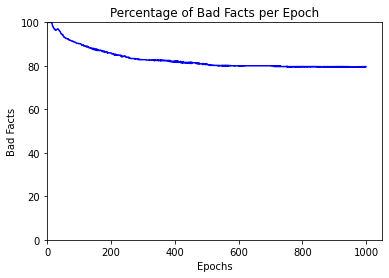

In [18]:
x = np.arange(len(badFactsPerEpoch))

plt.plot(x, badFactsPerEpoch, color='blue', linestyle='-')
plt.title("Percentage of Bad Facts per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Bad Facts")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylim(top=100)
plt.show()